# ASSIGNMENT-2 , ANUBHAV JAIN(22123004)


In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

In [2]:
# IMPORTING CRACKED DATA
data_1=os.listdir('C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\train\\cracked')   
#IMPORTING UNCRACKED DATA
data_2=os.listdir('C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\train\\uncracked') 


In [ ]:
#CONVERTING THE IMAGE DATA OF CRACKRD AND UNCRACKED FILES INTO 50*50 PIXEL SIZE IN GREYSCALE

In [3]:

from PIL import Image

# Set the source directory for the images and the output CSV file path
source_dir = 'C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\train\\uncracked'
output_path = 'C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\anubhav\\uncraracked.csv'


data = []

# Loop over the image files in the directory
for file_name in os.listdir(source_dir):
    # Open the image and resize it to 50*50 pixels
    image = Image.open(os.path.join(source_dir, file_name)).convert('L')

    # Convert  to grayscale
    gray_image = image.resize((50,50))


    # Convert the image to a numpy array and flatten it to a 1D array
    pixels = np.array(gray_image).flatten()
    # Add the flattened array to the list
    data.append(pixels)

# Create a pandas dataframe 
df = pd.DataFrame(data)
df.insert(0,'label','uncracked')

# Save  to a CSV file
df.to_csv(output_path, index=False)


In [5]:

from PIL import Image

# Set the source directory for the images and the output CSV file path
source_dir = 'C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\train\\cracked'
output_path = 'C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\anubhav\\cracked.csv'

ata = []

# Loop over the image files in the directory
for file_name in os.listdir(source_dir):
#      resize it to 50*50 pixels
    image = Image.open(os.path.join(source_dir, file_name)).convert('L')

    # Convert to grayscale
    gray_image = image.resize((50,50))


    # Convert the image to a numpy array and flatten it to a 1D array
    pixels = np.array(gray_image).flatten()
    # Add the flattened array to the list
    data.append(pixels)

# Create a pandas dataframe from the list of pixel values
df = pd.DataFrame(data)
df.insert(0,'label','cracked')

# Save the dataframe to a CSV file
df.to_csv(output_path, index=False)


In [6]:
import pandas as pd
import numpy as np
# Load the two CSV files into separate Pandas dataframes
df1 = pd.read_csv("C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\anubhav\\cracked.csv") 
df2 = pd.read_csv("C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\anubhav\\uncraracked.csv") 
# TWO csv FILES ARE CREATED , ER HAVE TO MERGE THEM RANDOMLY AND MAKE ONE SINGLE FILE 


In [7]:
# merged_df = pd.concat([df1, df2], axis=0, ignore_index=True)
merged_df = pd.concat([df1, df2], axis=0, ignore_index=True)

merged_df.to_csv("C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\anubhav\\merged_file.csv", index=False)

In [8]:


# Shuffle the rows of the merged dataframe using np.random.permutation method:
shuffled_df = merged_df.reindex(np.random.permutation(merged_df.index))



# IMPORTING LIBRARIES FOR VGG16  MODEL

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


In [10]:
#  randomly mixing the 2 CSV files
dfg = pd.read_csv("C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\anubhav\\merged_file.csv")


In [11]:
y = dfg['label']
X=dfg.drop(['label'],axis=1)

In [12]:
X = dfg.drop('label', axis=1).values.reshape(-1, 50,50, 1)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

#  y contains categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))





C:\PYTHON 3.10\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
# # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

In [15]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

y_test = to_categorical(y_test)


In [16]:
import numpy as np
import pandas as pd
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load data from CSV file
data = pd.read_csv('C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\anubhav\\merged_file.csv')
X_gray = data.iloc[:, 1:].values.reshape(-1, 50,50, 1).astype('float32') # reshape to (n_samples, height, width, channels)
X = np.concatenate([X_gray]*3, axis=-1) # duplicate grayscale channel to create pseudo-RGB images
y = data.iloc[:, 0].values

# Convert string labels to numeric labels using label encoding
le = LabelEncoder()
y = le.fit_transform(y)

# Convert numeric labels to one-hot encoding
ohe = OneHotEncoder(sparse=False)
y = ohe.fit_transform(y.reshape(-1, 1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(50,50, 3))

# Add custom top layers for grayscale image classification
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(le.classes_), activation='softmax')(x)

# Create a new model with custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate model on test set
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


C:\PYTHON 3.10\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
375/375 [==============================] - 90s 238ms/step - loss: 0.7478 - accuracy: 0.6749 - val_loss: 0.5826 - val_accuracy: 0.7108
Epoch 2/10
375/375 [==============================] - 94s 251ms/step - loss: 0.5261 - accuracy: 0.7238 - val_loss: 0.5865 - val_accuracy: 0.7114
Epoch 3/10
375/375 [==============================] - 95s 253ms/step - loss: 0.5034 - accuracy: 0.7348 - val_loss: 0.5655 - val_accuracy: 0.7198
Epoch 4/10
375/375 [==============================] - 94s 251ms/step - loss: 0.4770 - accuracy: 0.7576 - val_loss: 0.5650 - val_accuracy: 0.7208
Epoch 5/10
375/375 [==============================] - 96s 255ms/step - loss: 0.4617 - accuracy: 0.7627 - val_loss: 0.5890 - val_accuracy: 0.7214
Epoch 6/10
375/375 [==============================] - 94s 250ms/step - loss: 0.4448 - accuracy: 0.7726 - val_loss: 0.6025 - val_accuracy: 0.7178
Epoch 7/10
375/375 [==============================] - 97s 260ms/step - loss: 0.4377 - accuracy: 0.7811 - val_loss: 0.6248 - val_ac

# Test loss: 0.6957976222038269    ,  Test accuracy: 0.7181028723716736


# calculataing F1 score

In [2]:
from sklearn.metrics import f1_score

# Predict labels for test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score:', f1)


94/94 [==============================] - 35s 369ms/step
F1 score: 0.7459576926232551


# F1 score: 0.745


In [17]:
# Clearing the session frees up resources and ensures that the next training or testing session starts with a clean state.
from keras import backend as K
K.clear_session()


In [18]:
import gc
gc.collect()
# gc stands for Garbage Collector, which is a mechanism in Python that automatically frees up memory that is no longer 
# being used by the program.


2320

In [19]:
#  saving our VGG model 
model.save('vgg_model.h16')  


In [20]:
from keras.models import load_model

model = load_model('vgg_model.h16')


In [21]:
# lets convert the prediction images into the grey scale
import os
import numpy as np
import pandas as pd
from PIL import Image

 
# Set the source directory for the images and the output CSV file path
source_dir = 'C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\test'
output_path = 'C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\anubhav\\test_data.csv'

# Initialize an empty list to store the flattened pixel values
data = []
   
# Loop over the image files in the directory
for file_name in os.listdir(source_dir):
    # Open the image and resize it to 50*50 pixels
    image = Image.open(os.path.join(source_dir, file_name)).convert('L')

    # Convert the image to grayscale
    gray_image = image.resize((50,50))


    # Convert the image to a numpy array and flatten it to a 1D array
    pixels = np.array(gray_image).flatten()
    # Add the flattened array to the list
    data.append(pixels)

# Create a pandas dataframe from the list of pixel values
df = pd.DataFrame(data)


# Save the dataframe to a CSV file
df.to_csv(output_path, index=False)


In [22]:


# Load the saved model
model = load_model('vgg_model.h16')


In [25]:
# Load the test data from CSV file
data = pd.read_csv('C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\anubhav\\test_data.csv')
X_gray = data.iloc[:,0:].values.reshape(-1,50,50,1)# reshape to (n_samples, height, width, channels)
X = np.concatenate([X_gray]*3, axis=-1) 

In [26]:


# Set the source directory for the images and the output CSV file path
source_dir = 'C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\test'
output_path = 'C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\anubhav\\testing_new'

# Initialize an empty list to store the flattened pixel values
data = []

# Loop over the image files in the directory
for i in range(1, 2001):
    # Open the image and resize it to 50,50 pixels
    file_name = f'{i}.jpg'
    image = Image.open(os.path.join(source_dir, file_name)).convert('L')

    # Convert the image to grayscale
    gray_image = image.resize((50,50))

    # Convert the image to a numpy array and flatten it to a 1D array
    pixels = np.array(gray_image).flatten()
    # Add the flattened array to the list
    data.append(pixels)



In [27]:
# Create a pandas dataframe from the list of pixel values
df = pd.DataFrame(data)
df.insert(0,'Image',['{}.jpg'.format(i) for i in range(1,2001)])

# Load the model
model = load_model('vgg_model.h16')

# Reshape the data for input to the model
X_gray = df.iloc[:,1:].values.reshape(-1,50,50,1)
X = np.concatenate([X_gray]*3, axis=-1)




In [28]:
# Making final  predictions on the test data
predictions = model.predict(X)
labels = ['Cracked' if prediction[0] > prediction[1] else 'Uncracked' for prediction in predictions]

# Create a Pandas DataFrame with the predictions
df = pd.DataFrame({'Image': df['Image'], 'class': labels})

# Save the predictions to a CSV file
df.to_csv('C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\anubhav\\my_predictions.csv', index=False)

63/63 [==============================] - 10s 153ms/step


In [1]:
# my_predictions.csv file contains prediction made by our model.

In [4]:
import pandas as pd
import seaborn as sns

dk = pd.read_csv('C:\\Users\\ANUBHAV\\Desktop\\ASSIGNMENT_DATA\\anubhav\\my_predictions.csv')


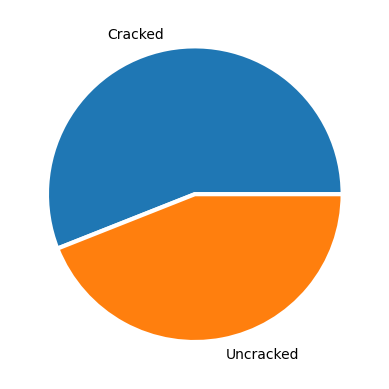

In [5]:
import matplotlib.pyplot as plt

# Get the counts of values in the desired column
counts = dk['class'].value_counts()

# Create a pie chart with the counts
plt.pie(counts.values, labels=counts.index, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.show()
